In [1]:
import tensorflow as tf    # tensorflow를 import하고, 이름을 tf로 지정 
import numpy as np    # numpy를 import하고, 이름을 np로 지정
import matplotlib.pyplot as plt    # matplotlib 라이브러리의 pyplot 모듈을 import하고, 이름을 plt로 지정

tf.enable_eager_execution()    # 즉시 실행(Eager Execution) 모드로 변경(그래프 기반 모드에서 즉시 실행 모드로 변경)

In [2]:
x_data = [1, 2, 3, 4, 5]    # x_data 정의
y_data = [1, 2, 3, 4, 5]    # y_data 정의

(0, 8)

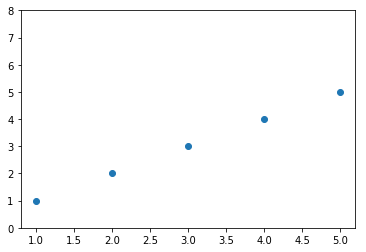

In [3]:
plt.plot(x_data, y_data, 'o')    # (x_data, y_data)에 대응하는 좌표값들을 그리고, 점(작은 원)으로 표현
plt.ylim(0, 8)    # y축의 범위를 설정(0~8)

In [4]:
v =[1., 2., 3., 4.]    # v list를 정의(reduce_mean함수를 테스트하기 위한)
tf.reduce_mean(v)    # v list의 element 평균을 계산

<tf.Tensor: id=6, shape=(), dtype=float32, numpy=2.5>

In [5]:
tf.square(3)    # 3의 제곱을 계산

<tf.Tensor: id=9, shape=(), dtype=int32, numpy=9>

In [6]:
x_data = [1, 2, 3, 4, 5]    # x_data 정의
y_data = [1, 2, 3, 4, 5]    # y_data 정의

W = tf.Variable(2.0)    # W 값을 정의하기 위해 tf.Variable을 생성, 2.0을 노드에 삽입
b = tf.Variable(0.5)    # b 값을 정의하기 위해 tf.Variable을 생성, 0.5를 노드에 삽입

hypothesis = W * x_data + b    # hypothesis(가설)을 정의 : W(weight) * x_data + b(bias)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
W.numpy(), b.numpy()    # W 노드에 삽입된 데이터를 출력, b 노드에 삽입된 데이터를 출력

(2.0, 0.5)

In [8]:
hypothesis.numpy()    # hypothesis 노드에 삽입된 데이터를 출력(2.0 * [1, 2, 3, 4, 5] + 0.5, broadcasting 발생)

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

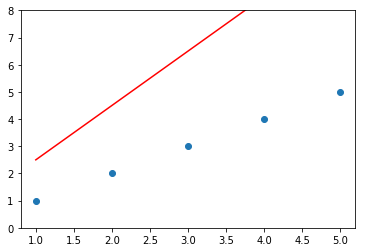

In [9]:
plt.plot(x_data, hypothesis.numpy(), 'r-')    # (x_data, hypothesis.numpy())에 대응하는 좌표값들을
                                              # 그리고, 직선으로 표현
plt.plot(x_data, y_data, 'o')    # (x_data, y_data)에 대응하는 좌표값들을 그리고, 점(작은 원)으로 표현
plt.ylim(0, 8)    # y축의 범위를 설정(0~8)
plt.show()    # 그림을 출력(Jupyter Notebook을 사용하기 때문에 plt.show() 없이 그림이 출력되는 상황)

In [10]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))    # cost function 정의 : (1/m) * ∑(i=1~m) (H(xi)-(yi))^2

In [11]:
with tf.GradientTape() as tape:    # with 범위 내 variable들의 변화를 tape에 기록 (여기서는 W와 b가 해당)
    hypothesis = W * x_data + b    # hypothesis(가설)을 정의 : W(weight) * x_data + b(bias)
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))    # cost function 정의 : (1/m) * ∑(i=1~m) (H(xi)-(yi))^2

W_grad, b_grad = tape.gradient(cost, [W, b])    # gradient 함수가 cost function을 W, b에 대하여
                                                # 미분한 값을 tuple 형태로 반환 반환된 값을 W_grad, b_grad가 참조 
                                                # tape.gradient(GradientTape.gradient) 호출 직후
                                                # tape(GradientTape)에포함된 리소스는 해제됨
W_grad.numpy(), b_grad.numpy()    # W_grad 노드에 삽입된 데이터를 출력, b_grad 노드에 삽입된 데이터를 출력

(25.0, 7.0)

In [12]:
learning_rate = 0.01    # learning_rate를 0.01로 설정

W.assign_sub(learning_rate * W_grad)    # W = W - 0.01 * W_grad
b.assign_sub(learning_rate * b_grad)    # b = b - 0.01 * b_grad

W.numpy(), b.numpy()    # W 노드에 삽입된 데이터를 출력, b 노드에 삽입된 데이터를 출력

(1.75, 0.43)

(0, 8)

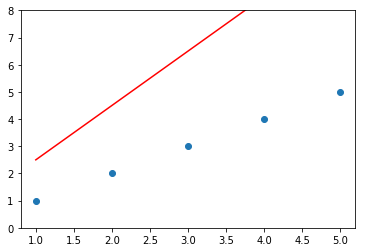

In [13]:
plt.plot(x_data, hypothesis.numpy(), 'r-')    # (x_data, hypothesis.numpy())에 대응하는 좌표값들을
                                              # 그리고, 직선으로 표현
plt.plot(x_data, y_data, 'o')    # (x_data, y_data)에 대응하는 좌표값들을 그리고, 점(작은 원)으로 표현
plt.ylim(0, 8)    # y축의 범위를 설정(0~8)

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


(0, 8)

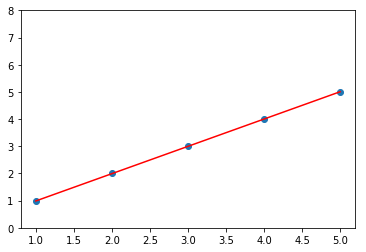

In [14]:
W = tf.Variable(2.9)    # W 값을 정의하기 위해 tf.Variable을 생성, 2.9를 노드에 삽입
b = tf.Variable(0.5)    # b 값을 정의하기 위해 tf.Variable을 생성, 0.5를 노드에 삽입

for i in range(100):    # 100회 시행
    with tf.GradientTape() as tape:    # with 범위 내 variable들의 변화를 tape에 기록 (여기서는 W와 b가 해당)
        hypothesis = W * x_data + b    # hypothesis(가설)을 정의 : W(weight) * x_data + b(bias)
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))    
                                                    # cost function 정의 : (1/m) * ∑(i=1~m) (H(xi)-(yi))^2
    W_grad, b_grad = tape.gradient(cost, [W, b])    # gradient 함수가 cost function을 W, b에 대하여
                                                    # 미분한 값을 tuple 형태로 반환
                                                    # 반환된 값을 W_grad, b_grad가 참조
                                                    # tape.gradient(GradientTape.gradient) 호출 직후,
                                                    # tape(GradientTape)에 포함된 리소스는 해제됨
    W.assign_sub(learning_rate * W_grad)    # W = W - learning_rate * W_grad
    b.assign_sub(learning_rate * b_grad)    # b = b - learning_rate * b_grad
                                            # (learning_rate는 위에 0.01로 정의되어있음.)
    if i % 10 == 0:    # 10회마다
        # i 값(step), W(weight) 값, b(bias) 값, cost function 값 출력
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')    # (x_data, y_data)에 대응하는 좌표값들을 그리고, 점(작은 원)으로 표현
plt.plot(x_data, hypothesis.numpy(), 'r-')    # (x_data, hypothesis.numpy())에 대응하는
                                              # 좌표값들을 그리고, 직선으로 표현
plt.ylim(0, 8)    # y축의 범위를 설정(0~8)

In [15]:
print(W * 5 + b)    # W * 5 + b 값을 출력
print(W * 2.5 + b)    # W * 2.5 + b 값을 출력

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)
